TABLA DE CONTENIDO

Paso 4. Análisis exploratorio de datos (Python)

1. Importación de archivos /datasets/project_sql_result_01.csv
 /datasets/project_sql_result_04.csv 
 /datasets/project_sql_result_07.csv

2. Estudio de los datos Descripción de los datos

3. Verificación de tipos de datos

4. Análisis de los 10 principales barrios Identificación de los barrios con mayor número de finalizaciones.

5. Visualización de datos Gráfico de empresas de taxis y número de viajes.
    Gráfico de los 10 barrios principales por número de finalizaciones

6. Conclusiones 

Paso 5. Prueba de hipótesis (Python)

1. Descripción de los datos

2. Estudio de los datos.

3. Planteamiento de la hipótesis

4. Conclusiones.

Paso 4. Análisis exploratorio de datos (Python)

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np  
from scipy import stats as st


from scipy.stats import ttest_ind
from scipy.stats import levene

In [33]:
result_01 = pd.read_csv('moved_project_sql_result_01.csv')
result_04 = pd.read_csv('moved_project_sql_result_04.csv')
result_07 = pd.read_csv('moved_project_sql_result_07.csv')

2. Estudiar los datos que contiene

In [34]:
result_01.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [35]:
result_04.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [36]:
result_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [37]:
result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


3. Asegurarte de que los tipos de datos sean correctos.

In [38]:
ausentes_01 = result_01.isna().sum()
ausentes_01

company_name    0
trips_amount    0
dtype: int64

In [39]:
ausentes_04 = result_04.isna().sum()
ausentes_04

dropoff_location_name    0
average_trips            0
dtype: int64

In [40]:
duplicados_01 = result_01.duplicated().sum()
duplicados_01

0

In [41]:
duplicados_04 = result_04.duplicated().sum()
duplicados_04

0

Los valores de las tablas son correctos. Para el dataset result_01, no hay valores nulos ni ausentes. La columna company_name es de tipo object y la columna trips_amount es de tipo int64. El dataset result_04 no tiene valores ausentes ni duplicados. La columna dropoff_location_name es de tipo object y la columna average_trips es de tipo float64. Por lo tanto, no hay que realizar ningún cambio a los datos

4. Identifica los 10 principales barrios en términos de finalización

In [42]:
top_10_neigborhood = result_04[result_04['dropoff_location_name'].isin(result_04['dropoff_location_name'].head(10))]
top_10_neigborhood

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


5. Hacer gráficos: Empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.

Grafica 1. Empresas de taxis y número de viajes.

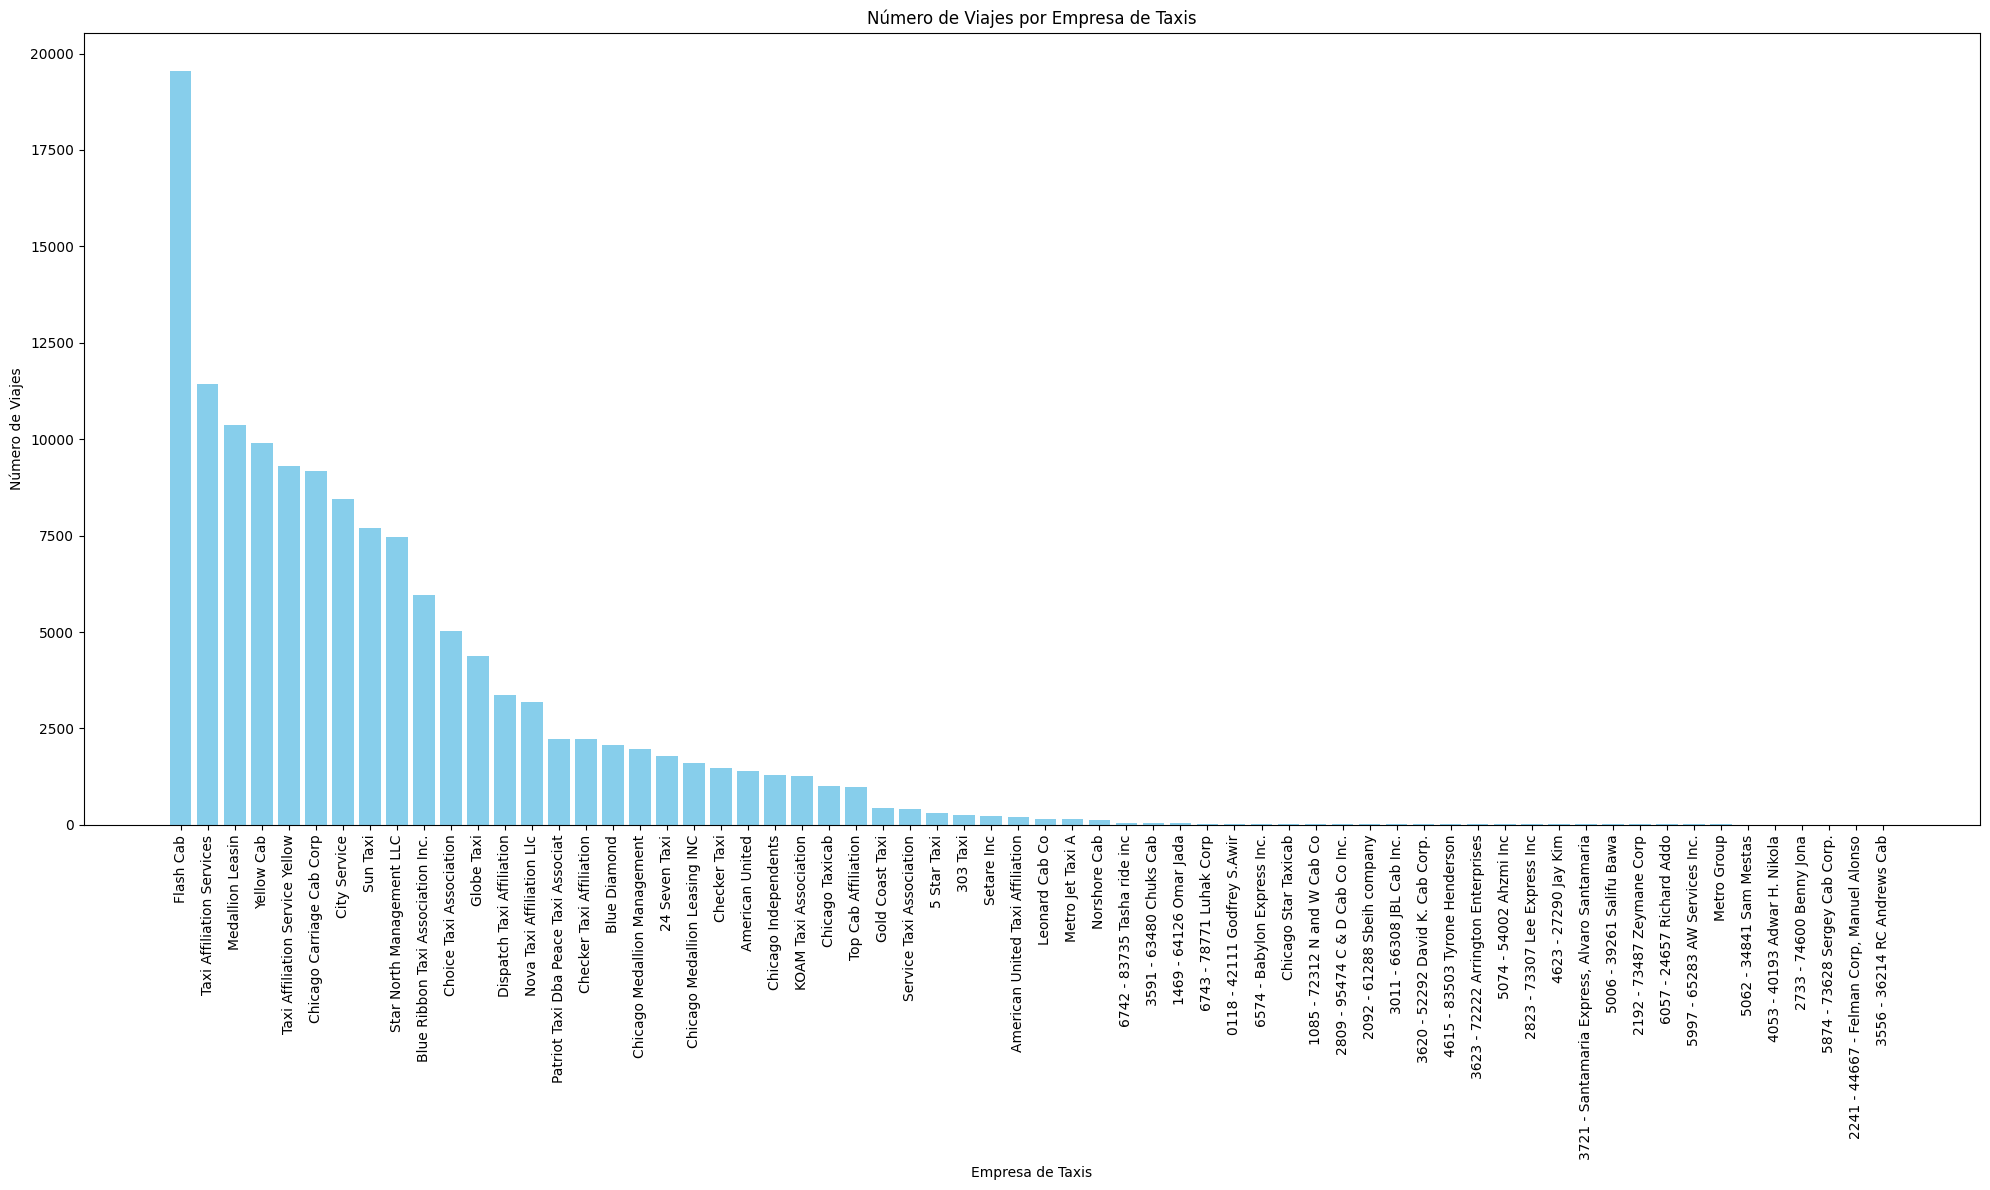

In [43]:
plt.figure(figsize=(20, 12))
plt.bar(result_01['company_name'], result_01['trips_amount'], color='skyblue')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Número de Viajes por Empresa de Taxis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Gráfico 2.Los 10 barrios principales por número de finalizaciones.

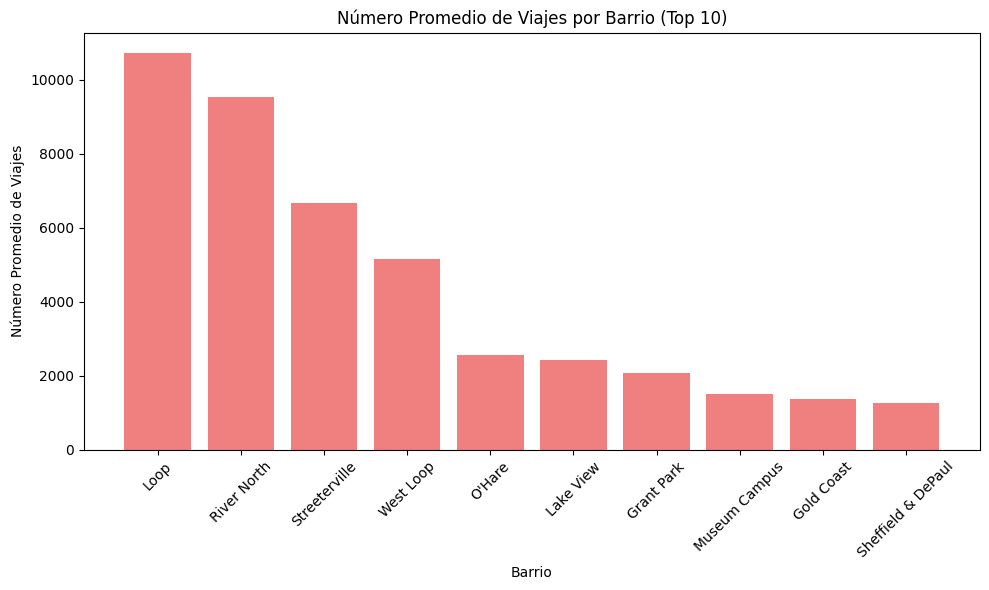

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_neigborhood['dropoff_location_name'], top_10_neigborhood['average_trips'], color='lightcoral')
plt.xlabel('Barrio')
plt.ylabel('Número Promedio de Viajes')
plt.title('Número Promedio de Viajes por Barrio (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Conclusiones. 

las cinco principales empresas en términos de número de viajes son: Flash Cab con 19558 viajes, Taxi Affiliation Services con 11422 viajes, Medallion Leasing con 10367 viajes, Yellow Cab con 9888 viajes y Taxi Affiliation Service Yellow con 9299 viajes. Estas cinco empresas juntas tienen una gran proporción del total de viajes comparado con las demás. Se observa una disminución gradual en el número de viajes entre las empresas.

La gráfica muestra una distribución de los viajes promedio por barrio, destacando los 10 principales barrios. Los tres principales barrios en términos de número promedio de viajes son: Loop con 10727.47 viajes, River North con 9523.67 viajes y Streeterville con 6664.67 viajes. Existe una disminución significativa en el número promedio de viajes desde Loop hasta West Loop, que ocupa el cuarto lugar con 5163.67 viajes. El barrio con el menor número promedio de viajes dentro del top 10 es Sheffield & DePaul con 1259.77 viajes, mostrando una gran diferencia con el líder Loop.

Paso 5. Prueba de hipótesis (Python)

1. Descripción de los datos Campos de la tabla

In [45]:
result_07

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [46]:
result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


2. Estudio de los datos

In [47]:
# valores ausentes

ausentes_07 = result_07.isna().sum()
ausentes_07

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [48]:
# Valores duplicados

duplicados_07 = result_07[result_07.duplicated()].count()
duplicados_07

start_ts              197
weather_conditions    197
duration_seconds      197
dtype: int64

In [49]:
# borar los duplicados 

result_07 = result_07.drop_duplicates()

In [50]:
# verificar que se boraron los duplicados 

duplicados_07 = result_07[result_07.duplicated()].count()
duplicados_07

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [51]:
# convertit start_ts  de tipo objetc a datatime

result_07['start_ts']= pd.to_datetime(result_07['start_ts'])
print(result_07['start_ts'].dtype)

datetime64[ns]


C:\Users\dpand\AppData\Local\Temp\ipykernel_21004\2583133808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_07['start_ts']= pd.to_datetime(result_07['start_ts'])


In [52]:
result_07.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


Al revisar los datos no se encuentran valores ausentes, se elimina 197 valores duplicados, la columna start_ts que es de tipo object se transforma a datatime asi poder llevar a cabo el correcto análisis de los datos.

In [53]:
sabados = result_07.loc[result_07['start_ts'].dt.weekday == 5]
sabados

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1060,2017-11-04 14:00:00,Good,2700.0
1061,2017-11-18 16:00:00,Bad,2186.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0


In [54]:
sabados_lluvia = sabados[sabados['weather_conditions'] == "Bad"]['duration_seconds']
sabados_lluvia

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 148, dtype: float64

In [55]:
sabados_no_lluvia = sabados[sabados['weather_conditions'] == "Good"]['duration_seconds']
sabados_no_lluvia

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1057    2492.0
1059    1303.0
1060    2700.0
1063       0.0
1064    1318.0
Name: duration_seconds, Length: 723, dtype: float64

3. Planteamiento de la hipótesis

Hipótesis

HO: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambian los sábados lluviosos.

H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [56]:
type(sabados_no_lluvia)

pandas.core.series.Series

In [57]:
#  Realizar el test de Levene para igualdad de varianzas

levene_stat, levene_p = levene(sabados_lluvia, sabados_no_lluvia)

print(f'Test de Levene para user_score: Estadístico={levene_stat}, p-value={levene_p}')

# Dependiendo del p-value del test de Levene, decidir si usar varianzas iguales o desiguales en el t-test
equal_var = levene_p >= 0.05

Test de Levene para user_score: Estadístico=0.000586951625283602, p-value=0.9806770360671218


In [58]:
alpha = 0.05

results =  st.ttest_ind(
    sabados_lluvia, 
    sabados_no_lluvia,
    equal_var = False)

print('valor p:',results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 9.126383933880083e-08
Rechazamos la hipótesis nula


4. Conclusiones

1. Cómo planteaste las hipótesis nula y alternativa:

A partir la premisa dada en el proyecto, La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.formule la hipotesis nula y la hipotesis alternativa.
    
HO: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambian los sábados lluviosos.


2.	Qué criterio usaste para probar las hipótesis y por qué.

Utilicé una prueba t para muestras independientes para comparar las medias de dos muestras independientes: los tiempos de duración de los viajes en sábados lluviosos y sábados no lluviosos. El criterio específico utilizado fue:

Prueba de Levene: Primero, realicé la prueba de Levene para verificar si las varianzas de las dos muestras eran iguales. 
El resultado del p-valor de la prueba de Levene fue 0.9807, lo que es mucho mayor que α=0.05. Esto indica que no hay suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas.